# Project – Numerical Methods for Ordinary Differential Equations

## 📌 Overview
This project investigates the accuracy and stability of numerical methods for solving ordinary differential equations (ODEs).  
The focus is on explicit vs implicit schemes, stability regions, and the behavior of errors as step sizes change.

---

## 🧮 Problem Formulation
We study the general initial value problem (IVP):

$$
y'(t) = f(t, y(t)), \quad y(t_0) = y_0,
$$

where $f(t,y)$ can produce stiff or oscillatory solutions depending on the setup.  
Test cases include linear decay $y' = -y$, oscillatory systems, and nonlinear dynamics.

---

## ⚙️ Methods
1. **One-step methods**  
   - Explicit Euler  
   - Implicit Euler  
   - Midpoint method  
   Compared for stability and accuracy on simple test ODEs.  

2. **Runge–Kutta methods**  
   - Classical RK4 scheme  
   - Studied convergence order and stability regions.  

3. **Multi-step methods**  
   - Adams–Bashforth (explicit)  
   - Adams–Moulton (implicit)  
   - Backward Differentiation Formula (BDF)  
   Implemented characteristic polynomials and checked the **root condition** for stability.  

4. **Error analysis**  
   - Computed local and global errors for decreasing step sizes $h$.  
   - Plotted error decay to verify theoretical convergence orders.  
   - Visualized stability regions for explicit vs implicit methods.  

---

## 📊 Results
- Explicit Euler diverges for stiff problems unless $h$ is very small.  
- Implicit Euler is unconditionally stable but slightly more diffusive.  
- RK4 showed clear 4th-order convergence and wider stability region.  
- Multi-step methods demonstrated how higher efficiency is possible but stability depends on satisfying the root condition.  
- Stability plots provided visual confirmation of theoretical regions.  


---

## ✅ Key Takeaways
- Learned how to connect **theoretical stability (root condition, stability regions)** with numerical experiments.  
- Built implementations of **Euler, RK, and multi-step methods** in Python.  
- Verified convergence rates through systematic error analysis.  
- Gained insight into trade-offs between accuracy, stability, and computational cost in ODE solvers.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81    
l = 1.0      # length of pendulum 
m = 1.0      # mass

t0 = 0.0        
tf = 10.0               
h = 0.01              
n_steps = int((tf - t0)/h)

q0 = np.pi / 4  
p0 = 0.0                 # q' = 0

def f(t, y):
    q, p = y
    dqdt = p
    dpdt = - (g / l) * np.sin(q)
    return np.array([dqdt, dpdt])


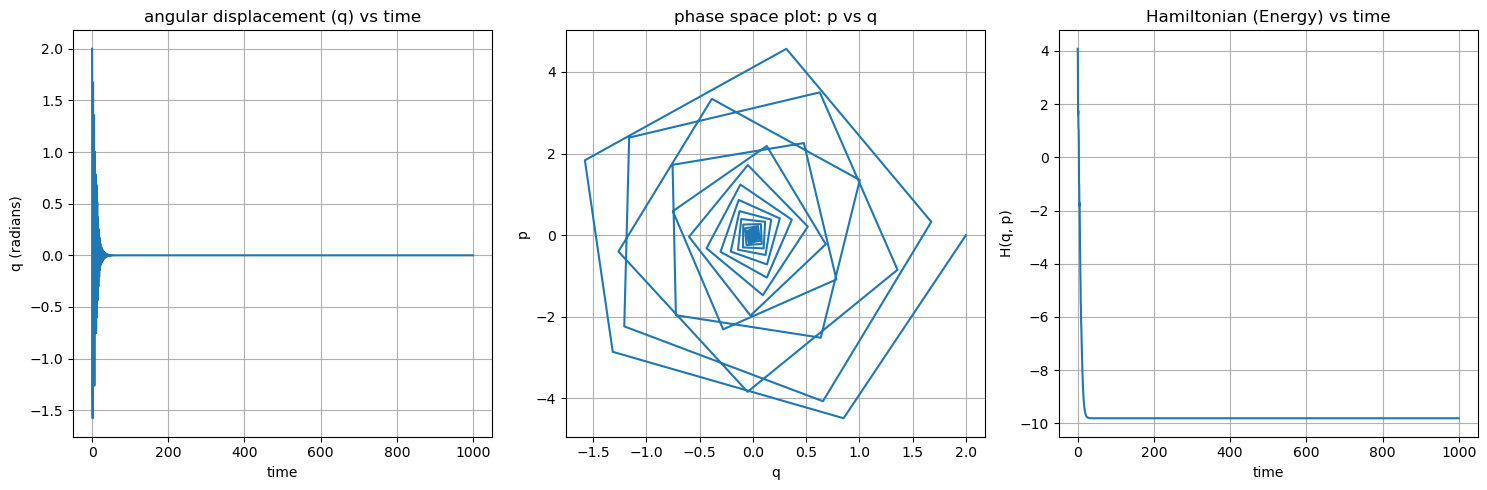

In [10]:
def H(q, p):
    return 0.5 * p**2 - (g / l) * np.cos(q)

# Initial conditions
q0, p0 = 2.0, 0.0
y0 = [q0, p0]
t0, tf = 0.0, 1000.0
h = 0.5
n_steps = int((tf - t0) / h)

# initialize arrays to store solution
t_values = np.linspace(t0, tf, n_steps + 1)
y_values = np.zeros((n_steps + 1, 2))  # each row will be [q, p]
hamiltonians = np.zeros(n_steps + 1)   # store H values
y_values[0] = [q0, p0]
hamiltonians[0] = H(q0, p0)

# classical rk4 implementation
for i in range(n_steps):
    t = t_values[i]
    y = y_values[i]
    
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    
    y_next = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    y_values[i+1] = y_next
    hamiltonians[i+1] = H(y_next[0], y_next[1])

# extract q and p
q_values = y_values[:, 0]
p_values = y_values[:, 1]

# plot results
plt.figure(figsize=(15, 5))

# plot angle q over time
plt.subplot(1, 3, 1)
plt.plot(t_values, q_values)
plt.title("angular displacement (q) vs time")
plt.xlabel("time")
plt.ylabel("q (radians)")
plt.grid(True)

# plot phase space
plt.subplot(1, 3, 2)
plt.plot(q_values, p_values)
plt.title("phase space plot: p vs q")
plt.xlabel("q")
plt.ylabel("p")
plt.grid(True)

# plot Hamiltonian
plt.subplot(1, 3, 3)
plt.plot(t_values, hamiltonians)
plt.title("Hamiltonian (Energy) vs time")
plt.xlabel("time")
plt.ylabel("H(q, p)")
plt.grid(True)

plt.tight_layout()
plt.show()


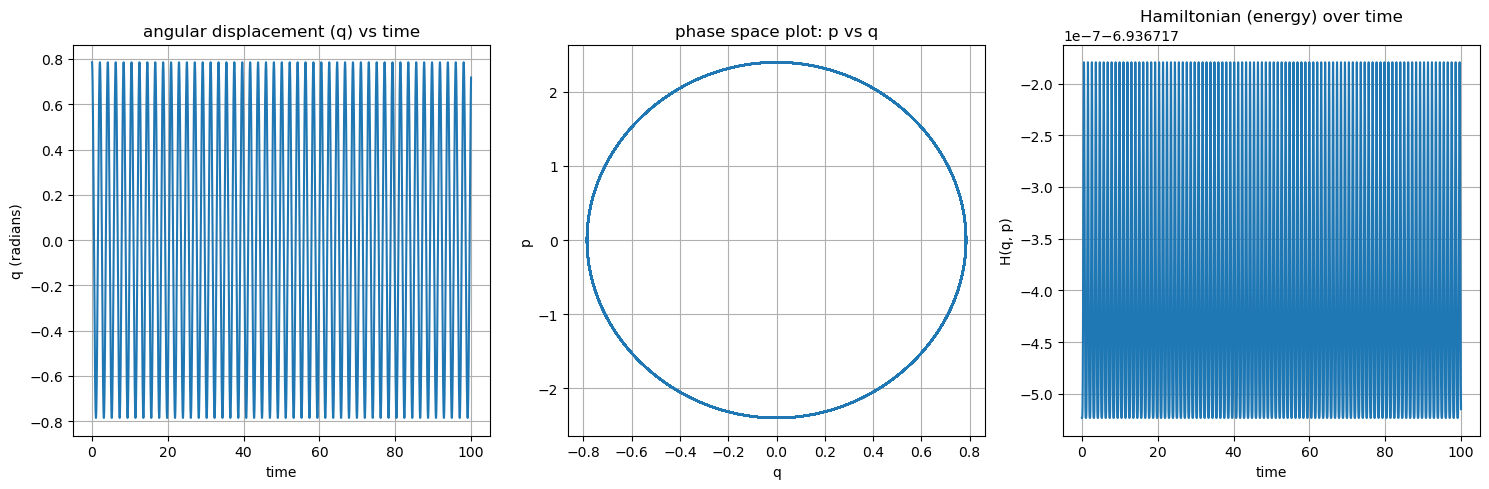

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# initial conditions
q0 = np.pi / 4  # initial angle
p0 = 0.0        # initial momentum

# time setup
t0 = 0.0
tf = 100.0
h = 0.001
n_steps = int((tf - t0) / h)

# create time array
t_values = np.linspace(t0, tf, n_steps+1)

# storage for solution and hamiltonian
y_values_imp = np.zeros((n_steps+1, 2))  # [q, p]
y_values_imp[0] = [q0, p0]
hamiltonian_values = np.zeros(n_steps+1)
hamiltonian_values[0] = H(q0, p0)

# implicit midpoint method
def implicit_midpoint_step(t, y, h):
    def G(z):
        midpoint = 0.5 * (y + z)
        return z - y - h * f(t + h/2, midpoint)
    z0 = y.copy()
    sol = opt.root(G, z0, method='hybr')
    return sol.x

# iterate through time
for i in range(n_steps):
    t = t_values[i]
    y = y_values_imp[i]
    y_next = implicit_midpoint_step(t, y, h)
    y_values_imp[i+1] = y_next
    q_next, p_next = y_next
    hamiltonian_values[i+1] = H(q_next, p_next)

# extract q and p for plotting
q_values_imp = y_values_imp[:, 0]
p_values_imp = y_values_imp[:, 1]

# plot everything
plt.figure(figsize=(15, 5))

# subplot 1: q(t)
plt.subplot(1, 3, 1)
plt.plot(t_values, q_values_imp, label="q(t) [implicit midpoint]")
plt.title("angular displacement (q) vs time")
plt.xlabel("time")
plt.ylabel("q (radians)")
plt.grid(True)

# subplot 2: phase space
plt.subplot(1, 3, 2)
plt.plot(q_values_imp, p_values_imp)
plt.title("phase space plot: p vs q")
plt.xlabel("q")
plt.ylabel("p")
plt.grid(True)

# subplot 3: Hamiltonian over time
plt.subplot(1, 3, 3)
plt.plot(t_values, hamiltonian_values, label="Hamiltonian")
plt.title("Hamiltonian (energy) over time")
plt.xlabel("time")
plt.ylabel("H(q, p)")
plt.grid(True)

plt.tight_layout()
plt.show()


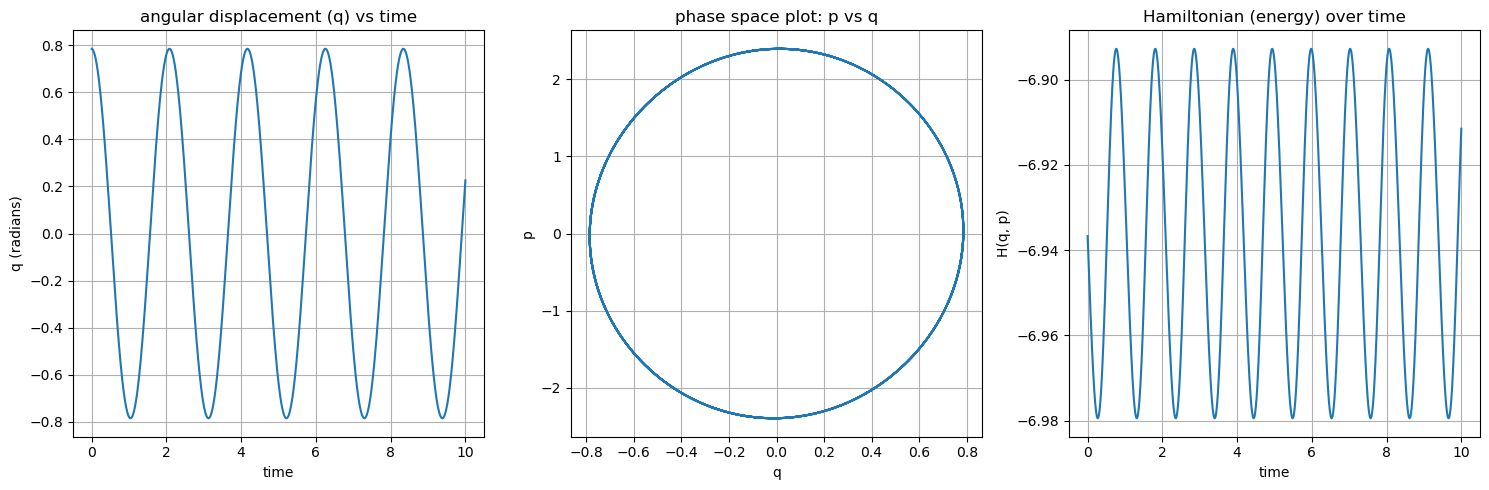

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# initial conditions
q0 = np.pi / 4
p0 = 0.0

# time setup
t0 = 0.0
tf = 10.0
h = 0.01
n_steps = int((tf - t0) / h)
t_values = np.linspace(t0, tf, n_steps+1)

# initialize storage
y_values_symp = np.zeros((n_steps+1, 2))
hamiltonian_values = np.zeros(n_steps+1)
y_values_symp[0] = [q0, p0]
hamiltonian_values[0] = H(q0, p0)

# symplectic euler integration
for i in range(n_steps):
    q_n, p_n = y_values_symp[i]
    p_next = p_n - h * (g / l) * np.sin(q_n)     # dH/dq
    q_next = q_n + h * p_next                    # dH/dp uses p_{n+1}
    y_values_symp[i+1] = [q_next, p_next]
    hamiltonian_values[i+1] = H(q_next, p_next)

# extract q and p
q_values_symp = y_values_symp[:, 0]
p_values_symp = y_values_symp[:, 1]

# plot everything
plt.figure(figsize=(15, 5))

# q(t)
plt.subplot(1, 3, 1)
plt.plot(t_values, q_values_symp, label="q(t) [symplectic euler]")
plt.title("angular displacement (q) vs time")
plt.xlabel("time")
plt.ylabel("q (radians)")
plt.grid(True)

# phase space
plt.subplot(1, 3, 2)
plt.plot(q_values_symp, p_values_symp)
plt.title("phase space plot: p vs q")
plt.xlabel("q")
plt.ylabel("p")
plt.grid(True)

# Hamiltonian over time
plt.subplot(1, 3, 3)
plt.plot(t_values, hamiltonian_values)
plt.title("Hamiltonian (energy) over time")
plt.xlabel("time")
plt.ylabel("H(q, p)")
plt.grid(True)

plt.tight_layout()
plt.show()


## 1. Classical Runge-Kutta 4 (RK4), 4th order

**Pros:**
- High accuracy for small step sizes.
- Simple and does not require solving nonlinear equations.

**Cons:**
- **Not symplectic** – it **does not preserve energy**.
- Over long time simulations, the Hamiltonian **drifts** (energy increases or decreases steadily).

## 2. Implicit Midpoint Method, 2nd order

**Pros:**
- **Symplectic** – it preserves the geometric structure of Hamiltonian systems.
- **Conserves energy** very well (Hamiltonian stays bounded).
- Stable for larger time steps.

**Cons:**
- Requires solving a **nonlinear equation** at every step (slower, more complex).

## 3. Symplectic Euler Method, 1st order

**Pros:**
- **Symplectic** – preserves phase-space structure.
- Simple, fast, and **explicit**.

**Cons:**
- Lower accuracy per step than RK4.
- Energy is **not constant**, but fluctuates (bounded oscillations).

